homework 7
---
due: May 10 2022

authors: pegler, prüwasser, scheftner

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy import io,stats,linalg
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Source: Gelman et al (2021). Regression and other stories
df = pd.read_csv('data/kidiq.csv') 

## data exploration

print data table, explore number of potential predictors, data-set size

In [2]:
print(df.shape[1],"variables")
print("n =",df.shape[0])

5 variables
n = 434


In [3]:
df.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


In [4]:
df.describe()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
count,434.000000,434.000000,434.000000,434.000000,434.000000
mean,86.797235,0.785714,100.000000,2.896313,22.785714
std,20.410688,0.410799,15.000000,1.181394,2.701070
min,20.000000,0.000000,71.037405,1.000000,17.000000
25%,74.000000,1.000000,88.660321,2.000000,21.000000
50%,90.000000,1.000000,97.915254,3.000000,23.000000
75%,102.000000,1.000000,110.272742,4.000000,25.000000
max,144.000000,1.000000,138.893106,4.000000,29.000000


### defining features and target

In [5]:
y_name = "kid_score"
X_names = ['mom_hs', 'mom_iq', 'mom_work', 'mom_age']

### visualizating the data

#### distributions

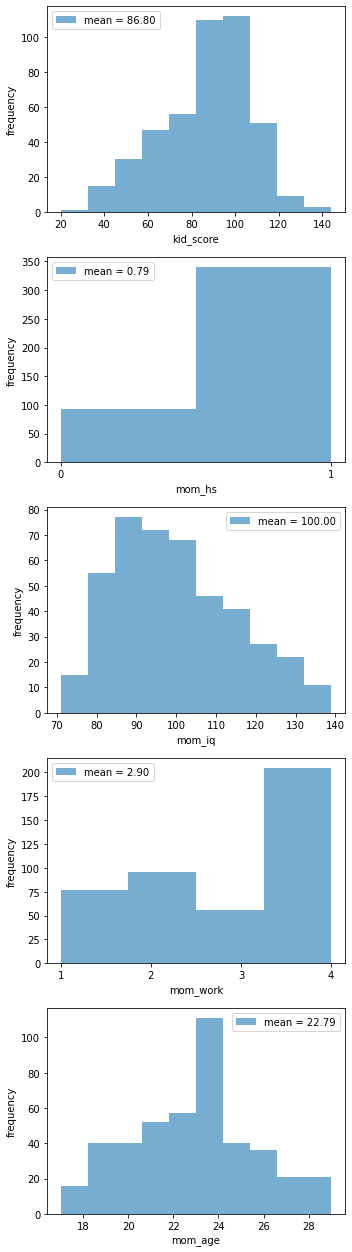

In [6]:
# main plot
plt_rows = 5
plt_cols = 1
plt.subplots(plt_rows, plt_cols, figsize = (5, 17.5))

# hist target
plt.subplot(plt_rows, plt_cols, 1)
plt.hist(df[y_name], alpha = 0.6, label = f"mean = {df[y_name].mean():.2f}")
plt.ylabel("frequency")
plt.xlabel(y_name)
plt.legend()

# hists features
for i, x_name in enumerate(X_names):
    plt.subplot(plt_rows, plt_cols, i+2)
    plt.hist(df[x_name], bins = len(df[x_name].unique()) if len(df[x_name].unique()) < 10 else None, alpha = 0.6, label = f"mean = {df[x_name].mean():.2f}")
    plt.xticks(df[x_name].unique() if len(df[x_name].unique()) < 10 else None)
    plt.ylabel("frequency")
    plt.xlabel(x_name)
    plt.legend()
    
# make all labels fit into the plot
plt.tight_layout()

#### Distribution of outcome in groups

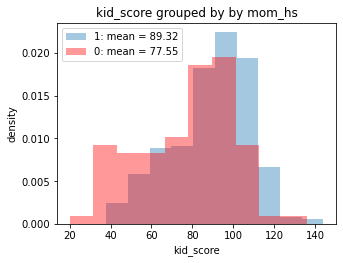

In [7]:
x_name = "mom_hs"

plt.figure(figsize=(5, 3.7))

x = 1
plt.hist(df.loc[df[x_name] == x, y_name], alpha = 0.4, density = True, label = f"{x}: mean = {df.loc[df[x_name] == x, y_name].mean():.2f}")
x = 0
plt.hist(df.loc[df[x_name] == x, y_name], alpha = 0.4, density = True, label = f"{x}: mean = {df.loc[df[x_name] == x, y_name].mean():.2f}", color = "red")

plt.title(f"{y_name} grouped by by {x_name}")
plt.ylabel("density")
plt.xlabel(y_name)
plt.legend();

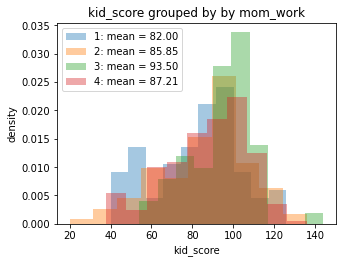

In [8]:
x_name = "mom_work"
x_vals = df[x_name].unique()
x_vals.sort()

plt.figure(figsize=(5,3.7))

for x in x_vals:
    plt.hist(df.loc[df[x_name] == x, y_name], alpha = 0.4, density = True, label = f"{x}: mean = {df.loc[df[x_name] == x, y_name].mean():.2f}")

plt.title(f"{y_name} grouped by by {x_name}")
plt.ylabel("density")
plt.xlabel(y_name)
plt.legend();

#### correlations

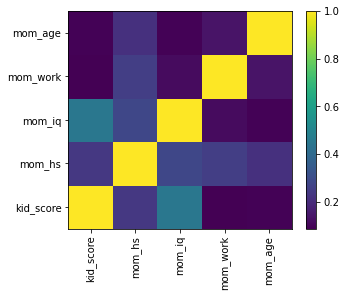

In [9]:
plt.figure(figsize=(5,4))
plt.pcolor(df.corr())
plt.colorbar()
ticks = np.linspace(.5, len(df.corr()) - 0.5, 5)
plt.xticks(ticks, labels=list(df.corr()), rotation = 90)
plt.yticks(ticks, labels=list(df.corr()));

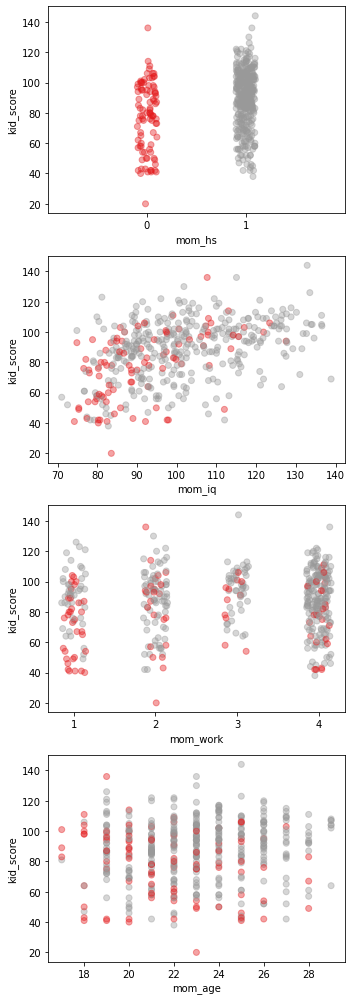

In [10]:
# main plot
plt_rows = 4
plt_cols = 1
plt.subplots(plt_rows, plt_cols, figsize = (5, 14))

# subplots
for i, x_name in enumerate(X_names):
    
    unique = len(df[x_name].unique())
    
    # jitter
    if unique < 5:
        jitter_bound = ((df[x_name].max() - df[x_name].min())) / len(df[x_name].unique()) / 5 # last value is for deviation
        jitter_noise = np.random.uniform(low = -jitter_bound, high = jitter_bound, size = len(df))
    else:
        jitter_noise = np.zeros(len(df))
    plt.subplot(plt_rows, plt_cols, i+1)
    plt.scatter(df[x_name] + jitter_noise, df[y_name], alpha = 0.4, c = df["mom_hs"], cmap = "Set1")
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.xticks(df[x_name].unique() if unique < 10 else None)
    plt.xlim(df[x_name].min()-1 if unique == 2 else None, df[x_name].max() + 1 if unique == 2 else None)
    
# make all labels fit into the plot
plt.tight_layout()

#### Boxplots for target grouped by our 2 categorical predictors

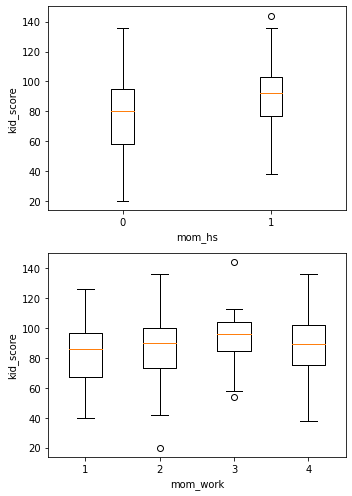

In [11]:
# main plot
plt.subplots(2, 1, figsize = (5, 7))

x_name = "mom_hs"
plt.subplot(2, 1, 1)
plt.boxplot([df.loc[df[x_name] == 0, y_name], df.loc[df[x_name] == 1, y_name]], positions = [0,1])
plt.ylabel(y_name);
plt.xlabel(x_name);

x_name = "mom_work"
plt.subplot(2, 1, 2)
plt.boxplot(
    [
        df.loc[df[x_name] == 1, y_name], 
        df.loc[df[x_name] == 2, y_name], 
        df.loc[df[x_name] == 3, y_name], 
        df.loc[df[x_name] == 4, y_name]
    ], 
    positions = [1,2,3,4])
plt.ylabel(y_name)
plt.xlabel(x_name)
plt.tight_layout();

## fit a linear regression

### model with 2 predictors: `mom_hs` and `mom_iq` 

In [12]:
x_name = ["mom_hs", "mom_iq"]

reg = LinearRegression()
reg.fit(df[x_name], df[y_name])
print("intercept:\t", round(reg.intercept_, 2))
print(f"slope {x_name[0]}:\t", round(reg.coef_[0], 2))
print(f"slope {x_name[1]}:\t", round(reg.coef_[1], 2))
print("R²:\t\t", round(reg.score(df[x_name], df[y_name]), 2))

intercept:	 25.73
slope mom_hs:	 5.95
slope mom_iq:	 0.56
R²:		 0.21


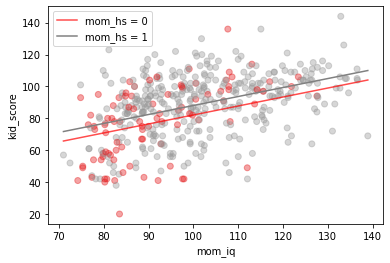

In [13]:
# line plots
xmin = df["mom_iq"].min()
xmax = df["mom_iq"].max()
y_0_min = reg.intercept_ + xmin * reg.coef_[1] 
y_0_max = reg.intercept_ + xmax * reg.coef_[1] 
y_1_min = reg.intercept_ + xmin * reg.coef_[1] + 1 * reg.coef_[0] 
y_1_max = reg.intercept_ + xmax * reg.coef_[1] + 1 * reg.coef_[0]
plt.plot([xmin, xmax], [y_0_min, y_0_max], label = "mom_hs = 0", color = "red", alpha = 0.7)
plt.plot([xmin, xmax], [y_1_min, y_1_max], label = "mom_hs = 1", color = "grey", alpha = 1)

# scatter plot
plt.scatter(df["mom_iq"], df[y_name], alpha = 0.4, c = df["mom_hs"], cmap = "Set1")

plt.xlabel("mom_iq")
plt.ylabel(y_name)
plt.legend();

### model with 3 predictors: `mom_hs`, `mom_iq` and interaction `mom_hs_x_mom_iq`

In [14]:
df["mom_hs_x_mom_iq"] = df["mom_hs"] * df["mom_iq"]

x_name = ["mom_hs", "mom_iq", "mom_hs_x_mom_iq"]

reg = LinearRegression()
reg.fit(df[x_name], df[y_name])
print("intercept:\t\t", round(reg.intercept_, 2))
print(f"slope {x_name[0]}:\t\t", round(reg.coef_[0], 2))
print(f"slope {x_name[1]}:\t\t", round(reg.coef_[1], 2))
print(f"slope {x_name[2]}:\t", round(reg.coef_[2], 2))
print("R²:\t\t\t", round(reg.score(df[x_name], df[y_name]), 2))

intercept:		 -11.48
slope mom_hs:		 51.27
slope mom_iq:		 0.97
slope mom_hs_x_mom_iq:	 -0.48
R²:			 0.23


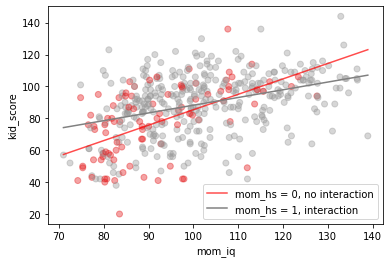

In [15]:
# line plots

y_0_min = reg.intercept_ + xmin * reg.coef_[1] 
y_0_max = reg.intercept_ + xmax * reg.coef_[1] 
y_1_min = reg.intercept_ + xmin * reg.coef_[1] + 1 * reg.coef_[0] + 1 * xmin * reg.coef_[2] 
y_1_max = reg.intercept_ + xmax * reg.coef_[1] + 1 * reg.coef_[0] + 1 * xmax * reg.coef_[2] 
plt.plot([xmin, xmax], [y_0_min, y_0_max], label = "mom_hs = 0, no interaction", color = "red", alpha = 0.7)
plt.plot([xmin, xmax], [y_1_min, y_1_max], label = "mom_hs = 1, interaction", color = "grey", alpha = 1)

# scatter plot
plt.scatter(df["mom_iq"], df[y_name], alpha = 0.4, c = df["mom_hs"], cmap = "Set1")

plt.xlabel("mom_iq")
plt.ylabel(y_name)
plt.legend();

## create training and test set

seprate the X and Y data, into an 80% training and 20% test set using indexing
for now, it is okay, just to take the first 80% of data as training and the last 20% as test data  
(this is clearly a wrong approach if the data is ordered)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# for later: create centered and scaled variables,
# the only variable that makes sense to be centered/scaled is mom_iq.
df["mom_iq_centered"] = df["mom_iq"] - df["mom_iq"].mean()
df["mom_hs_x_mom_iq_centered"] = df["mom_hs"] * df["mom_iq_centered"]

scaler = StandardScaler()
df["mom_iq_scaled"] = scaler.fit_transform(df[["mom_iq"]])
df["mom_hs_x_mom_iq_scaled"] = df["mom_hs"] * df["mom_iq_scaled"]

df_train, df_test = train_test_split(df, test_size=int(0.2 * len(df)))

print("shape of train set:",df_train.shape)
print("shape of test set:",df_test.shape)

shape of train set: (348, 10)
shape of test set: (86, 10)


In [17]:
df_train.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age,mom_hs_x_mom_iq,mom_iq_centered,mom_hs_x_mom_iq_centered,mom_iq_scaled,mom_hs_x_mom_iq_scaled
251,61,1,76.752185,4,25,76.752185,-23.247815,-23.247815,-1.551643,-1.551643
176,97,1,113.910375,4,28,113.910375,13.910375,13.910375,0.928429,0.928429
49,92,1,99.409224,4,28,99.409224,-0.590776,-0.590776,-0.039431,-0.039431
382,87,0,85.615796,1,19,0.000000,-14.384204,-0.000000,-0.960054,-0.000000
267,40,0,80.258014,1,20,0.000000,-19.741986,-0.000000,-1.317651,-0.000000


## fit the regression model on training set

<div class="alert alert-warning" role="alert">
  <strong>Note:</strong><br> 
    The split is a random event on which the individual scores depend, as a result especially the test score can vary dramatically. To get a more precise picture, the mean over a larger number of splits should be calculated.
</div>

In [137]:
x_name = ["mom_hs", "mom_iq", "mom_hs_x_mom_iq"]

reg = LinearRegression()
reg.fit(df_train[x_name], df_train[y_name])
print("intercept:\t\t", round(reg.intercept_, 2))
print(f"slope {x_name[0]}:\t\t", round(reg.coef_[0], 2))
print(f"slope {x_name[1]}:\t\t", round(reg.coef_[1], 2))
print(f"slope {x_name[2]}:\t", round(reg.coef_[2], 2))
print("R² train:\t\t", round(reg.score(df_train[x_name], df_train[y_name]), 3))
print("R² test:\t\t", round(reg.score(df_test[x_name], df_test[y_name]), 3))

intercept:		 -14.47
slope mom_hs:		 55.84
slope mom_iq:		 1.01
slope mom_hs_x_mom_iq:	 -0.54
R² train:		 0.231
R² test:		 0.194


## fit the regression model on mean centered and standardized data

the only variable that makes sense to be centered/scaled is `mom_iq`.

### centered

In [138]:
x_name = ["mom_hs", "mom_iq_centered", "mom_hs_x_mom_iq_centered"]

reg = LinearRegression()
reg.fit(df_train[x_name], df_train[y_name])
print("intercept:\t\t\t", round(reg.intercept_, 2))
print(f"slope {x_name[0]}:\t\t\t", round(reg.coef_[0], 2))
print(f"slope {x_name[1]}:\t\t", round(reg.coef_[1], 2))
print(f"slope {x_name[2]}:\t", round(reg.coef_[2], 2))
print("R² train:\t\t\t", round(reg.score(df_train[x_name], df_train[y_name]), 3))
print("R² test:\t\t\t", round(reg.score(df_test[x_name], df_test[y_name]), 3))

intercept:			 86.21
slope mom_hs:			 1.55
slope mom_iq_centered:		 1.01
slope mom_hs_x_mom_iq_centered:	 -0.54
R² train:			 0.231
R² test:			 0.194


### standardized

In [139]:
x_name = ["mom_hs", "mom_iq_scaled", "mom_hs_x_mom_iq_scaled"]

reg = LinearRegression()
reg.fit(df_train[x_name], df_train[y_name])
print("intercept:\t\t\t", round(reg.intercept_, 2))
print(f"slope {x_name[0]}:\t\t\t", round(reg.coef_[0], 2))
print(f"slope {x_name[1]}:\t\t", round(reg.coef_[1], 2))
print(f"slope {x_name[2]}:\t", round(reg.coef_[2], 2))
print("R² train:\t\t\t", round(reg.score(df_train[x_name], df_train[y_name]), 3))
print("R² test:\t\t\t", round(reg.score(df_test[x_name], df_test[y_name]), 3))

intercept:			 86.21
slope mom_hs:			 1.55
slope mom_iq_scaled:		 15.09
slope mom_hs_x_mom_iq_scaled:	 -8.13
R² train:			 0.231
R² test:			 0.194


### results

**after centering**
- the intercept changed
- the slope for mom_hs changed
- slopes for mom_iq and the interaction did not change
- the R² scores did not change 

**after standardizing**
- intercept and all coefficients changed
- intercept and slope for mom_hs are the same as forthe centered matrix
- the R² scores did not change

Roughly speaking, the results did not change, only the interpretation of the coefficients and the intercept did.

---
# Bonus

## Regularized regression

note: only difference to regular Linear Regression is the alpha parameter. If it's set to 0 Lasso and Ridge do just the same as plain Linear Regressoin

### Ridge with default alpha = 1

In [142]:
x_name = ["mom_hs", "mom_iq_scaled", "mom_hs_x_mom_iq_scaled"]

reg = Ridge(alpha = 1) 
reg.fit(df_train[x_name], df_train[y_name])
print("intercept:\t\t\t", round(reg.intercept_, 2))
print(f"slope {x_name[0]}:\t\t\t", round(reg.coef_[0], 2))
print(f"slope {x_name[1]}:\t\t", round(reg.coef_[1], 2))
print(f"slope {x_name[2]}:\t", round(reg.coef_[2], 2))
print("R² train:\t\t\t", round(reg.score(df_train[x_name], df_train[y_name]), 3))
print("R² test:\t\t\t", round(reg.score(df_test[x_name], df_test[y_name]), 3))

intercept:			 86.0
slope mom_hs:			 1.75
slope mom_iq_scaled:		 14.69
slope mom_hs_x_mom_iq_scaled:	 -7.71
R² train:			 0.231
R² test:			 0.195


### Lasso with default alpha = 1

In [143]:
x_name = ["mom_hs", "mom_iq_scaled", "mom_hs_x_mom_iq_scaled"]

reg = Lasso(alpha = 1) 
reg.fit(df_train[x_name], df_train[y_name])
print("intercept:\t\t\t", round(reg.intercept_, 2))
print(f"slope {x_name[0]}:\t\t\t", round(reg.coef_[0], 2))
print(f"slope {x_name[1]}:\t\t", round(reg.coef_[1], 2))
print(f"slope {x_name[2]}:\t", round(reg.coef_[2], 2))
print("R² train:\t\t\t", round(reg.score(df_train[x_name], df_train[y_name]), 3))
print("R² test:\t\t\t", round(reg.score(df_test[x_name], df_test[y_name]), 3))

intercept:			 86.32
slope mom_hs:			 0.01
slope mom_iq_scaled:		 8.06
slope mom_hs_x_mom_iq_scaled:	 -0.0
R² train:			 0.197
R² test:			 0.175


## Systematic exploration of Lasso and Ridge

#### Hyperparameter tuning for Ridge

Best model: Ridge(alpha=9.24924924924925)
R²:  0.198
Intercept: 84.88453146633971
Coefficients: [ 2.75793124 12.38311789 -5.23640638] 



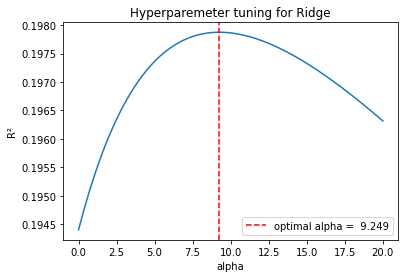

In [146]:
alpha_space = np.linspace(0, 20, num = 1000) # you have to play with these a little

best_score = 0
best_model = None
track_scores = []

for alpha in alpha_space:
    reg = Ridge(alpha = alpha)
    reg.fit(df_train[x_name], df_train[y_name])
    r2_score = reg.score(df_test[x_name], df_test[y_name])
    track_scores.append(r2_score)
    if  r2_score > best_score:
        best_score = reg.score(df_test[x_name], df_test[y_name])
        best_model = reg

print("Best model:", best_model)
print(f"R²: {best_score: .3f}")
print("Intercept:",best_model.intercept_)
print("Coefficients:",best_model.coef_, "\n")

plt.plot(alpha_space, track_scores)
plt.axvline(best_model.alpha, c = "red", linestyle ="--", label = f"optimal alpha = {best_model.alpha: .3f}")
plt.title("Hyperparemeter tuning for Ridge")
plt.ylabel("R²")
plt.xlabel("alpha")
plt.legend();

#### Hyperparameter tuning for Lasso

Best model: Lasso(alpha=0.08708708708714355)
R²:  0.195
Intercept: 86.1213627200724
Coefficients: [ 1.51176297 14.30692541 -7.22664213] 



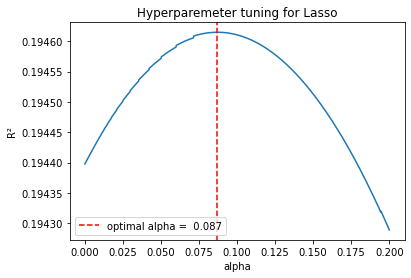

In [145]:
alpha_space = np.linspace(1e-13, 2e-1, num = 1000) # you have to play with these a little

best_score = 0
best_model = None
track_scores = []

for alpha in alpha_space:
    reg = Lasso(alpha = alpha)
    reg.fit(df_train[x_name], df_train[y_name])
    r2_score = reg.score(df_test[x_name], df_test[y_name])
    track_scores.append(r2_score)
    if  r2_score > best_score:
        best_score = reg.score(df_test[x_name], df_test[y_name])
        best_model = reg

print("Best model:", best_model)
print(f"R²: {best_score: .3f}")
print("Intercept:",best_model.intercept_)
print("Coefficients:",best_model.coef_, "\n")

plt.plot(alpha_space, track_scores)
plt.axvline(best_model.alpha, c = "red", linestyle ="--", label = f"optimal alpha = {best_model.alpha: .3f}")
plt.title("Hyperparemeter tuning for Lasso")
plt.ylabel("R²")
plt.xlabel("alpha")
plt.legend();

to make more general conclusions, we would need to repeat the training - test serpation mulitple times randomly, and integrate the behavior of lasso and ridge across these mulitple divisions

In [147]:
#